In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
from google.colab import files
uploaded=files.upload()

Saving fish.csv to fish (1).csv


In [16]:
df_fish=pd.read_csv('fish.csv',header=None)
df_fish

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


# **Preprocessing**

In [6]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [7]:
df_fish.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [8]:
df_fish.shape

(84, 7)

In [9]:
numeric_cols=df_fish.select_dtypes(include=['int64','float64']).columns
X=df_fish[numeric_cols]

In [10]:
df_fish.duplicated().sum()

np.int64(0)

In [11]:
df_fish.T.duplicated().sum()

np.int64(0)

In [17]:
df_fish=df_fish.drop(0,axis=1)
df_fish.head()

,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [18]:
#checking the null values
df_fish.isnull().mean()*100

,0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [19]:
X=df_fish.values

In [20]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# **ELBOW PLOT**

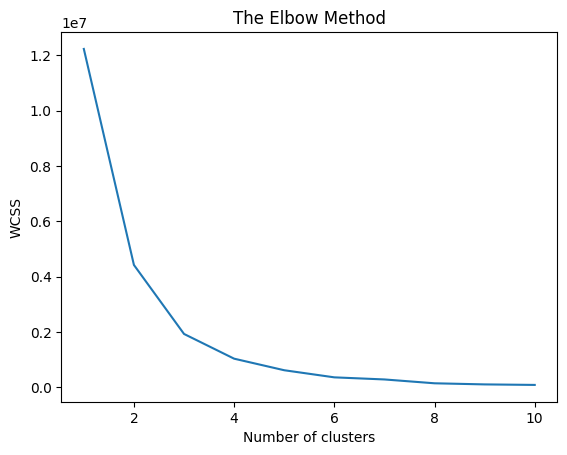

In [23]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#from the elbow plot,value of k is 3
# building the kmeans clustering model
kmeans = KMeans(n_clusters=3, init='k-means++') # model building
# max_iter can be set if we need to fix the number of iteration
y_kmeans = kmeans.fit_predict(X) # output generation

In [25]:
df_fish['Cluster'] = y_kmeans
df_fish.head()

,1,2,3,4,5,6,Cluster
0,242.0,23.2,25.4,30.0,38.4,13.4,1
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,0
3,363.0,26.3,29.0,33.5,38.0,13.3,0
4,430.0,26.5,29.0,34.0,36.6,15.1,0


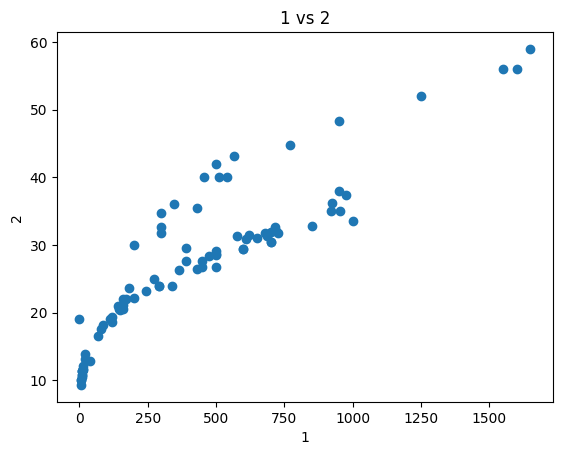

In [26]:
# before clustering
plt.scatter(df_fish[1], df_fish[2],)
plt.title('1 vs 2')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

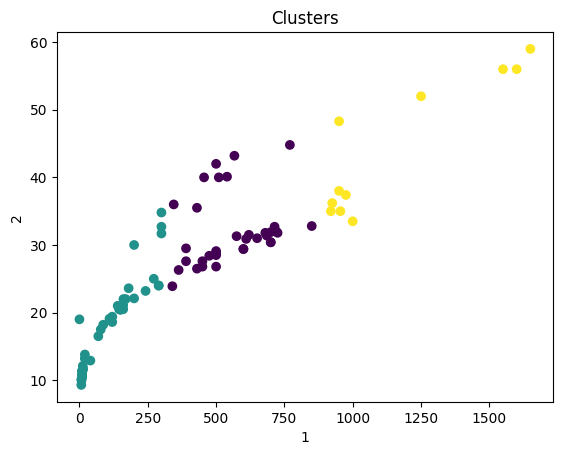

In [27]:
# after clustering
plt.scatter(df_fish[1], df_fish[2],
            c = df_fish['Cluster'])
plt.title('Clusters')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

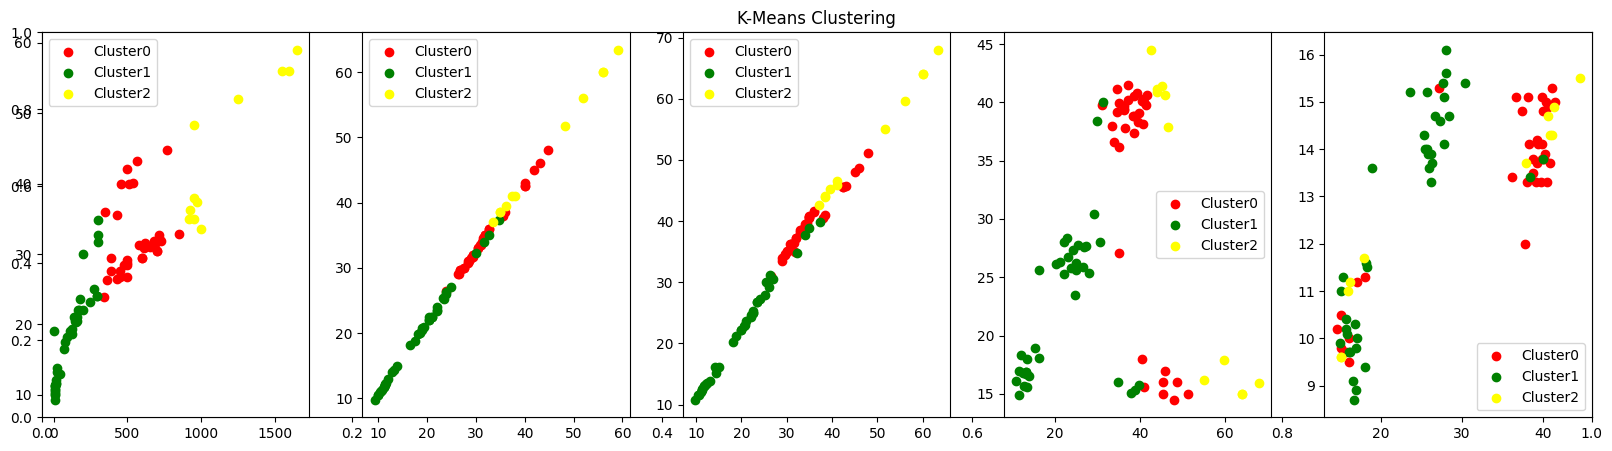

In [29]:
plt.figure(figsize=(20,5))
plt.title('K-Means Clustering')
colors = ['red', 'Green', 'Yellow']

#ploting 1 vs 2
plt.subplot(1,5,1)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][1],
              df_fish[df_fish['Cluster'] == i][2],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 2 vs 3
plt.subplot(1,5,2)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][2],
              df_fish[df_fish['Cluster'] == i][3],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 3 vs 4
plt.subplot(1,5,3)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][3],
              df_fish[df_fish['Cluster'] == i][4],
              c = colors[i], label = f'Cluster{i}')
plt.legend()
#ploting 4 vs 5
plt.subplot(1,5,4)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][4],
              df_fish[df_fish['Cluster'] == i][5],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

#ploting 5 vs 6
plt.subplot(1,5,5)
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster'] == i]
  plt.scatter(df_fish[df_fish['Cluster'] == i][5],
              df_fish[df_fish['Cluster'] == i][6],
              c = colors[i], label = f'Cluster{i}')
plt.legend()
plt.show()

In [31]:
# predict the cluster
def predict_cluster(val1, val2, val3, val4, val5, val6):
  new_data = [[val1, val2, val3, val4, val5, val6]]
  cluster = kmeans.predict(new_data)
  return cluster[0]



In [33]:
# Example of using the corrected predict_cluster function
predicted_cluster = predict_cluster(242.0, 23.2, 25.4, 30.0, 38.4, 13.4)
print('The values belong to the cluster', predicted_cluster)



The values belong to the cluster 1


# **Agglomerative clustering**

In [36]:
ag_cluster = linkage(X, method='ward')
# ward, single, centroid
# linkage matrix i.e; agglomerative cluster model


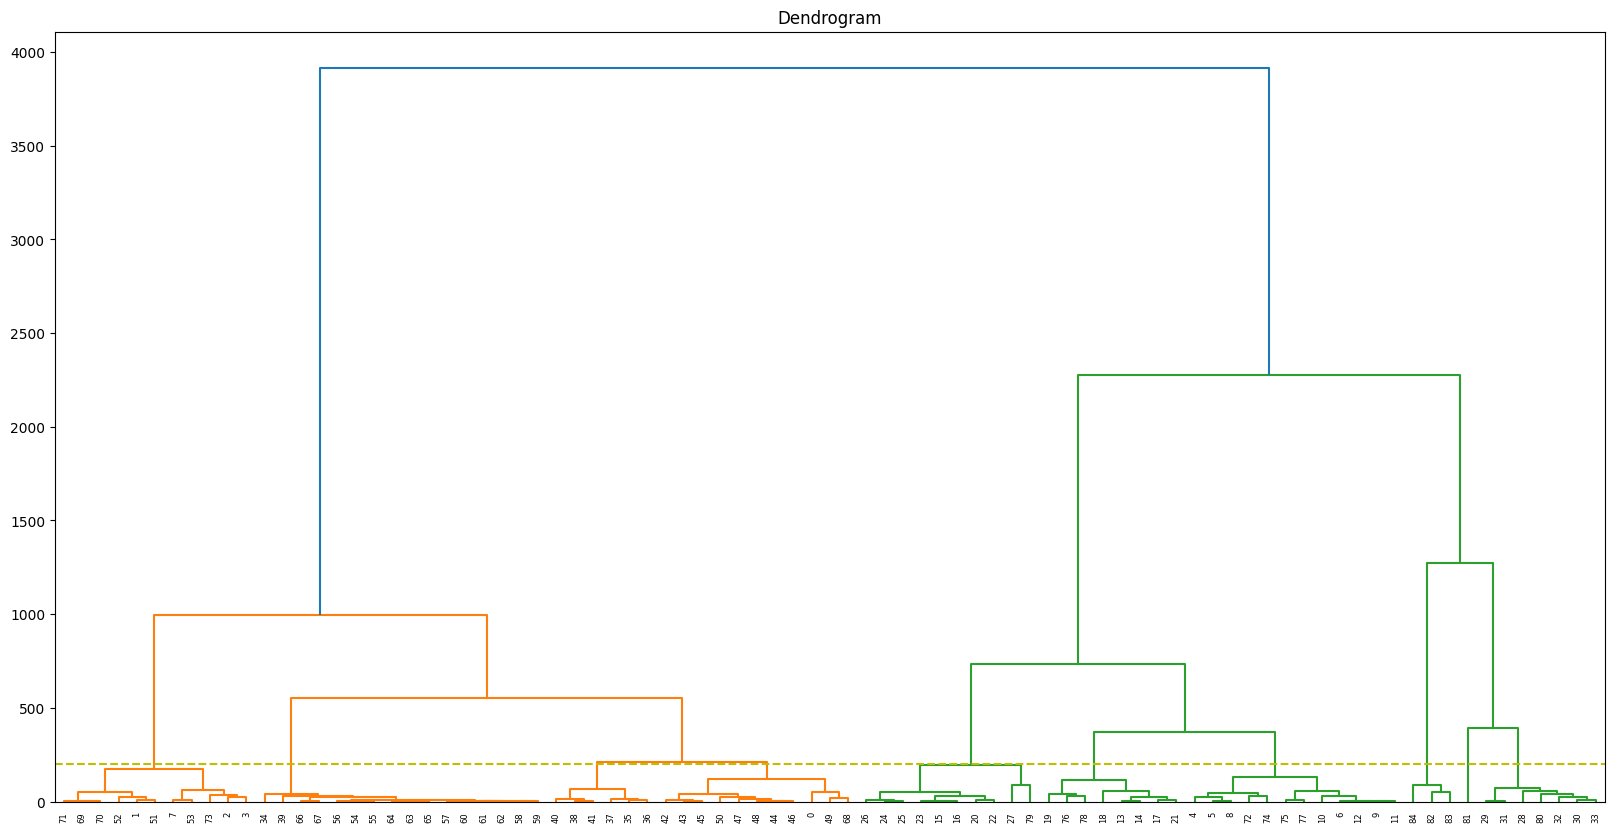

In [39]:
plt.figure(figsize=(20,10))
dendrogram(ag_cluster)
plt.axhline(y=200, color='y', linestyle='--')
plt.title('Dendrogram')
plt.show()


In [41]:
cluster_labels = fcluster(ag_cluster, t=200, criterion='distance')
df_fish['Cluster_Agglomerative'] = cluster_labels
df_fish.head()


,1,2,3,4,5,6,Cluster,Cluster_Agglomerative
0,242.0,23.2,25.4,30.0,38.4,13.4,1,4
1,290.0,24.0,26.3,31.2,40.0,13.8,1,1
2,340.0,23.9,26.5,31.1,39.8,15.1,0,1
3,363.0,26.3,29.0,33.5,38.0,13.3,0,1
4,430.0,26.5,29.0,34.0,36.6,15.1,0,7


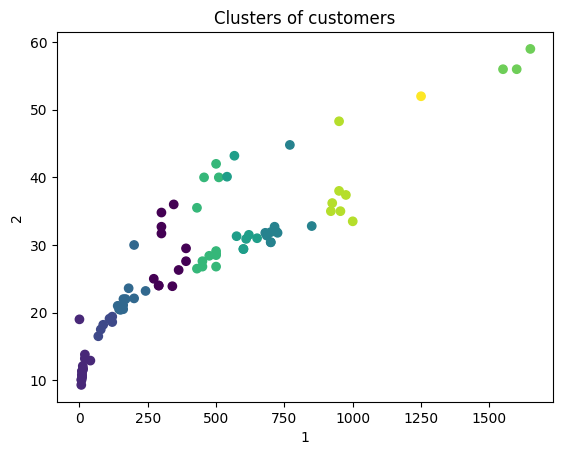

In [42]:
# after clustering
plt.scatter(df_fish[1], df_fish[2],
            c = df_fish['Cluster_Agglomerative'])
plt.title('Clusters of customers')
plt.xlabel('1')
plt.ylabel('2')
plt.show()



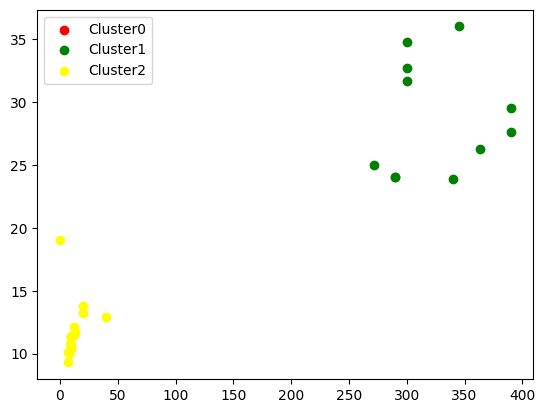

In [43]:
colors = ['red', 'Green', 'Yellow']
for i in range(3):
  cluster_data = df_fish[df_fish['Cluster_Agglomerative'] == i]
  plt.scatter(df_fish[df_fish['Cluster_Agglomerative'] == i][1],
              df_fish[df_fish['Cluster_Agglomerative'] == i][2],
              c = colors[i], label = f'Cluster{i}')
plt.legend()

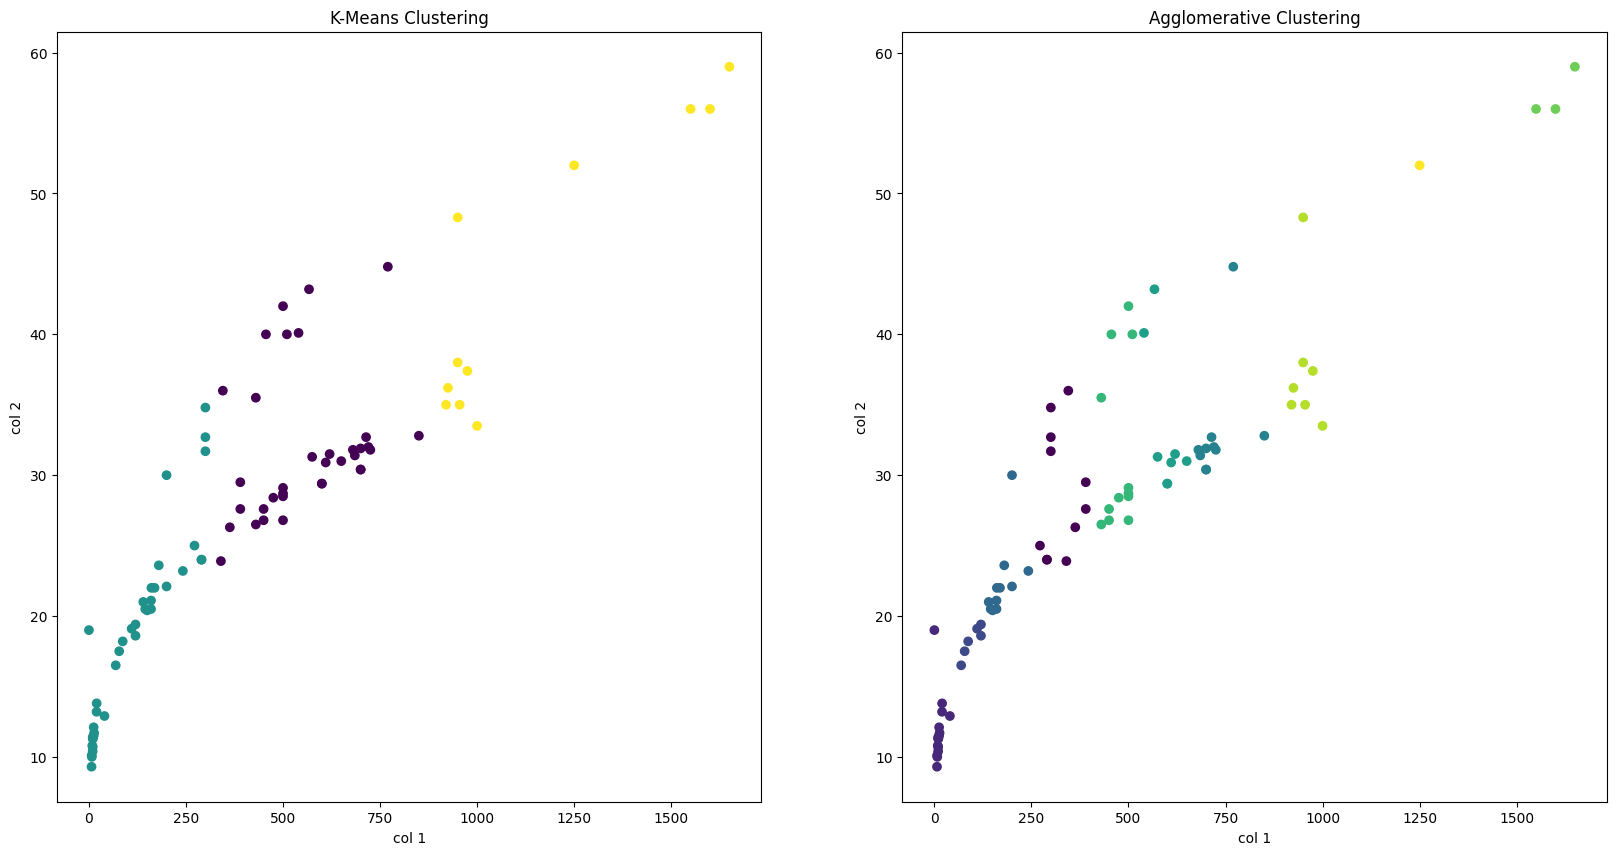

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(df_fish[1],
            df_fish[2],
            c = df_fish['Cluster'])
plt.title('K-Means Clustering')
plt.xlabel('col 1')
plt.ylabel('col 2')

plt.subplot(1,2,2)
plt.scatter(df_fish[1],
            df_fish[2],
            c = df_fish['Cluster_Agglomerative'])
plt.title('Agglomerative Clustering')
plt.xlabel('col 1')
plt.ylabel('col 2')

plt.show()